In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)
from my_lib.utils import sigmoid, ReLU, tanh

In [2]:
def show_activations_hist(activations):
    plt.figure(figsize=(15, 5))
    for idx, activation in activations.items():
        plt.subplot(1, len(activations), idx + 1)
        plt.title(str(idx + 1) + "-layer")
        if idx != 0:
            plt.yticks([], [])
        plt.xlim(0.0, 1)
        plt.ylim(0, 30000)
        plt.hist(activation.flatten(), 30, range=(0, 1))
    plt.show()

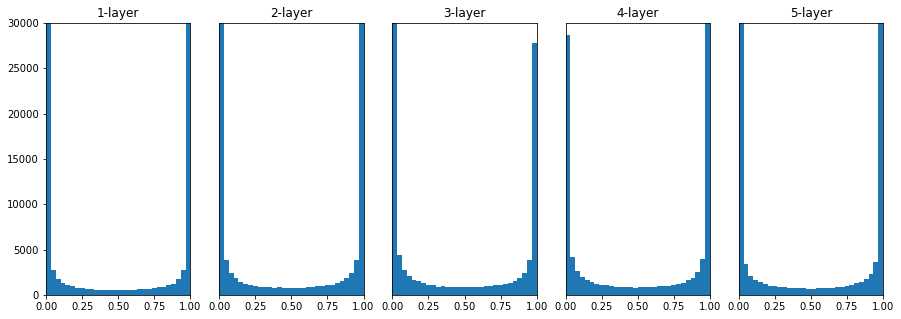

In [3]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
show_activations_hist(activations)

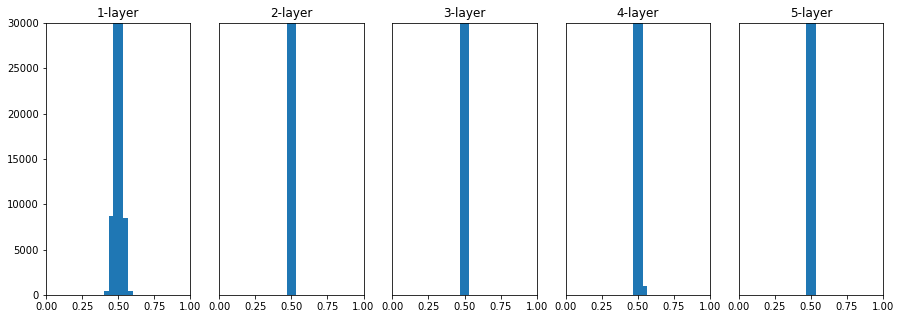

In [4]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
show_activations_hist(activations)

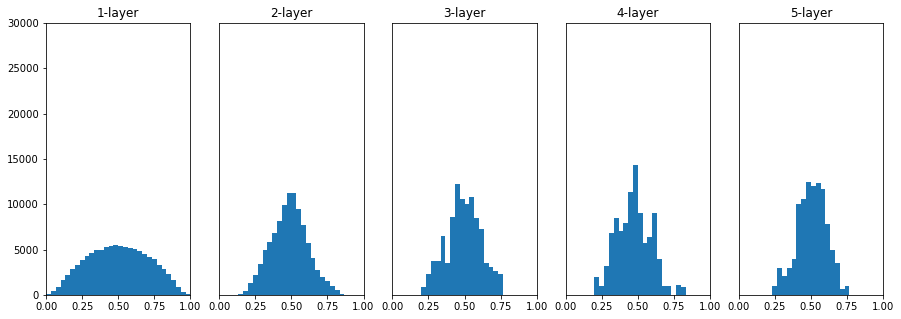

In [5]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

show_activations_hist(activations)

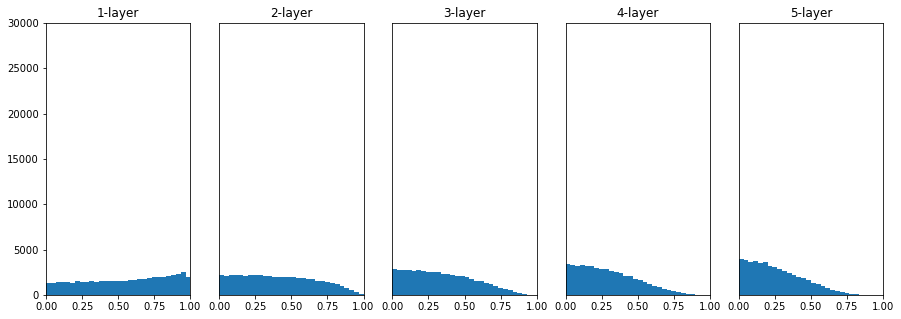

In [6]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z

show_activations_hist(activations)

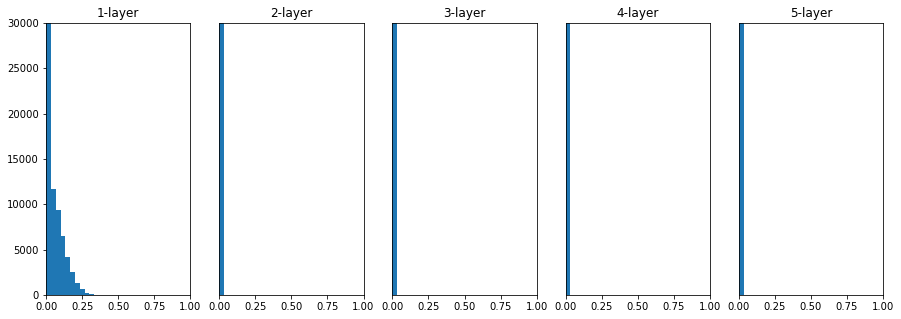

In [7]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

show_activations_hist(activations)

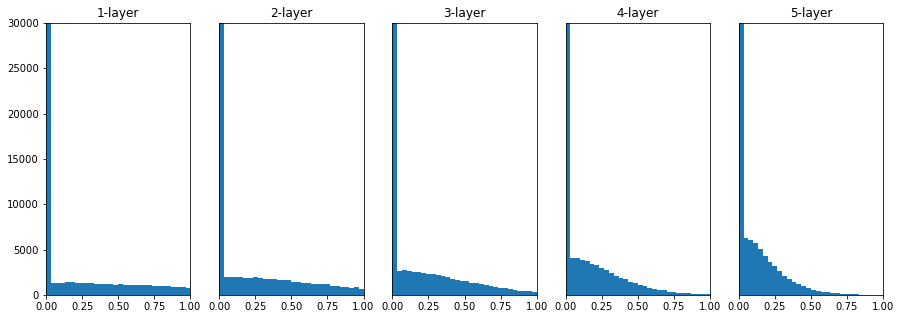

In [8]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

show_activations_hist(activations)

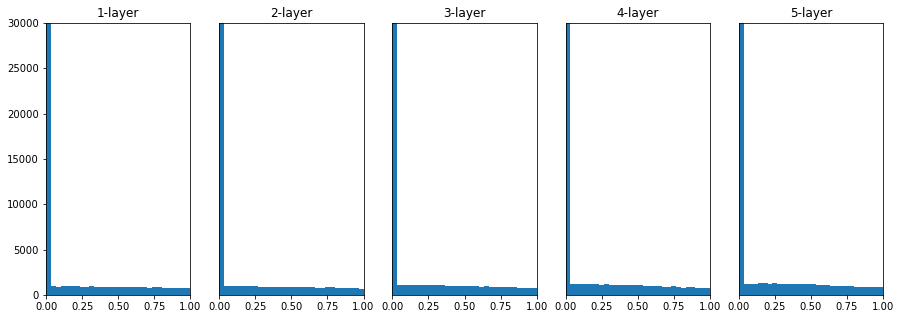

In [9]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

show_activations_hist(activations)

In [10]:
from dataset.mnist import load_mnist
from my_lib.net import MultiLayerNet
from my_lib.optimizer import SGD

In [11]:
def smooth_curve(x):
    """
    http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

In [12]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [13]:
weight_init_types = {"std=0.01": 0.01, "Xavier": "sigmoid", "He": "relu"}
optimizer = SGD(lr=0.01)

In [14]:
from my_lib.net import MultiLayerNet

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [15]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, y_batch)
        optimizer.update(networks[key].params, grads)
        loss = networks[key].loss(x_batch, y_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print(f"Iteration: {i}")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, y_batch)
            print(f"{key} : {loss}")

Iteration: 0
std=0.01 : 2.302522860619547
Xavier : 2.3173626073810834
He : 2.3475105888668684
Iteration: 100
std=0.01 : 2.3030442641959428
Xavier : 2.2547951424298285
He : 1.7467366531949244
Iteration: 200
std=0.01 : 2.302374823043918
Xavier : 2.1096198927935177
He : 0.7993820261971846
Iteration: 300
std=0.01 : 2.302317867986
Xavier : 1.7789712450444481
He : 0.6870206081695418
Iteration: 400
std=0.01 : 2.296937026245537
Xavier : 1.1304844692788145
He : 0.45354044706387425
Iteration: 500
std=0.01 : 2.300793137752947
Xavier : 0.8554354639816315
He : 0.4417975590312663
Iteration: 600
std=0.01 : 2.3045485148851714
Xavier : 0.5841439268819015
He : 0.3615846764069428
Iteration: 700
std=0.01 : 2.3004950382004394
Xavier : 0.5308933043388167
He : 0.3488520106118575
Iteration: 800
std=0.01 : 2.3014648275057557
Xavier : 0.48686530029871244
He : 0.31903885640054946
Iteration: 900
std=0.01 : 2.2982341946720357
Xavier : 0.31242233823433163
He : 0.21228077168468798
Iteration: 1000
std=0.01 : 2.301125

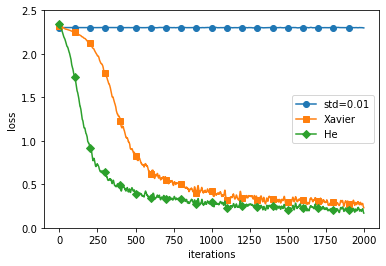

In [16]:
markers = {"std=0.01": "o", "Xavier": "s", "He": "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()